# ADVENTFJORDEN

This notebook contains a set of example scripts showing how the functions of the unisacsi package can be used to read data collected during fieldwork and create plots.

#### Importing packages, setting paths, ...

In [19]:
import unisacsi.Ocean as Oc
import unisacsi.Ocean_newmap as OcNewMap
import unisacsi.Meteo as Met
from unisacsi.MET_model_download import download_MET_model_static_fields, download_MET_model_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import gsw
import cmocean as cmo
from matplotlib.patches import Rectangle
import matplotlib.colors as colors

plt.rcParams["font.family"] = "times new roman"
#plt.rcParams["figure.figsize"]=10,8
plt.rcParams.update({'font.size': 15})

In [3]:
def TSdiagram(ax,Svals,Tvals,levels): #,month):
    """
    Make a TS diagram background: sigma0 contours as function of SA and CT
    """
    Tg,Sg = np.meshgrid(Tvals,Svals)
    sigma = gsw.sigma0(Sg,Tg)
    
    CS = ax.contour(Sg, Tg, sigma, linestyles='dashed', colors='grey', zorder=1, levels=levels)
    plt.clabel(CS, fontsize=13, inline=1, fmt='%0.2f')

Folder with map data from CTD (specify location):

In [66]:
#path_data = "C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/data_proc/PolarsysselCTD/"
path_data = "C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/data/CTD/Adventfjorden/221031"
#path_data = "C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/data/CTD/Adventfjorden/221103"

## Oceanography

### CTD

You can use the read_CTD function from the Ocean module of unisacsi to read one or several CTD data file. 
If you are unsure how to use it, simply check the docs using the help function (PS: this works for any Python function, if the creator has included documentation):

In [ ]:
# help(Oc.read_CTD)

In [67]:
CTD = Oc.read_CTD(f"{path_data}/")

CTD is a dictionary with one entry per station. Therefore, the keys of CTD are the station numbers:

In [7]:
print(CTD.keys())  # displays stations

dict_keys(['A15', 'A13', 'A9', 'A4', 'A5', 'A6', 'A7*', 'A2'])


Each station is again a dictionary with the variables as keys. Therefore, you can check the list of variables for one particular station using:

In [ ]:
#n = 'A15'; 
#print(CTD[n].keys()) # displays variables saved at each station

In [5]:
bath = "C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/gebco_2022_n79.19_s77.95_w13.48_e17.621.nc"

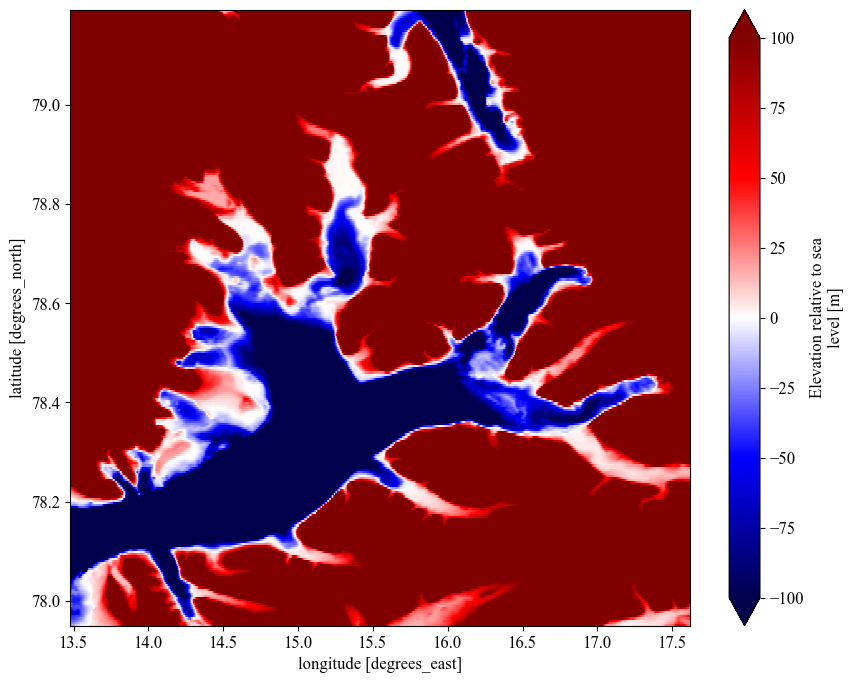

In [6]:
import xarray as xr
ds = xr.open_dataset(bath)
ds.elevation.plot(vmin = -100, vmax=100, cmap="seismic")

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Stereographic(central_latitude=78.5, central_longitude=15,))
    ax.set_extent([13.5,17.5,78,78.85], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    plt.show()


if __name__ == '__main__':
    main()

KeyboardInterrupt: 

<a list of 1199 text.Text objects>


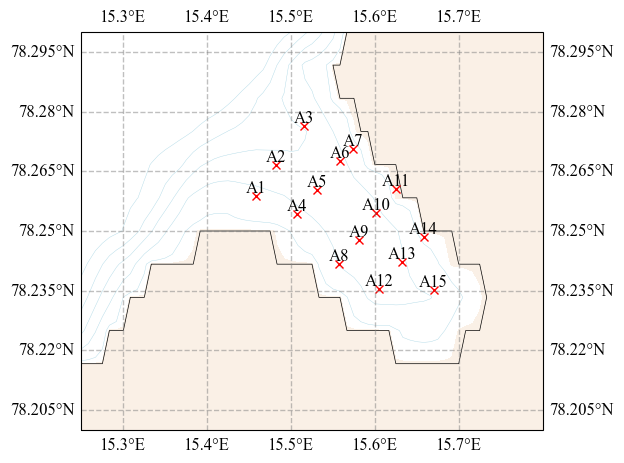

In [7]:
# Plot map off all stations [13.25,17.6,78.,78.85] [14.,16.,78.2,78.4]

path_data1 = "C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/data/CTD/Adventfjorden/221031"
path_data2 = "C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/data/CTD/Adventfjorden/221103"
CTD1 = Oc.read_CTD(f"{path_data1}/")
CTD2 = Oc.read_CTD(f"{path_data2}/")



plt.figure()
Oc.plot_CTD_map(CTD, extent=[15.25,15.8,78.2,78.3], topography = "C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/bathymetry_svalbard.mat")
plt.savefig("C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/ocean_plots/new_map_adv.png",bbox_inches = "tight", dpi = 300)

In [68]:
# CROSS SECTIONS ADVENTFJORDEN
# adv_outer = []
#adv_UNIS = ['322', '993', '323', '324'] 
adv_UNIS = ['A4', 'A5', 'A6', 'A7*'] 
adv_UNIS_D2 = ['A4', 'A5', 'A6', 'A7'] # Station Names second day (03/11/22)
# adv_middle = []
# adv_inner = []

# LONG SECTION
adv_along = ['A15', 'A13', 'A9', '993','A2'][::-1] # [::-1] flips array to start from A2
adv_along =  ['A15', 'A13', 'A9', 'A5','A2'][::-1]

adv_all = adv_UNIS+adv_along
print(adv_all)

adv_day2 = ['A1', 'A2', 'A3', 'A7', 'A6', 'A5', 'A4', 'A8', 'A9', 'A10', 'A11', 'A14', 'A13', 'A12', 'A15']

# ISFJORDEN CROSS SECTION
isfjorden = [f'{i}' for i in range(165, 171)][::-1]

section = adv_along # change for section of interest



['A4', 'A5', 'A6', 'A7*', 'A2', 'A5', 'A9', 'A13', 'A15']


None


C:\Users\annak\anaconda3\envs\myenv\lib\site-packages\cartopy\mpl\geoaxes.py:1614: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)


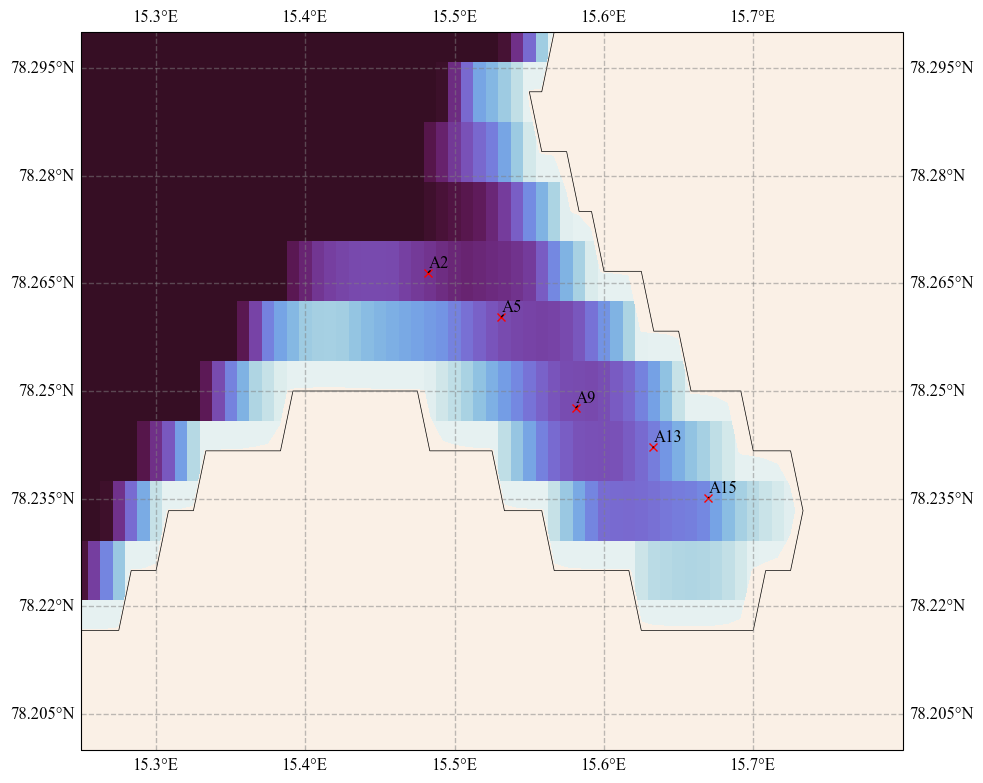

In [17]:
# Plot Map of Section

# plt.figure()
Oc.plot_CTD_map(CTD2, extent=[15.25,15.8,78.2,78.3], stations=section, topography="C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/bathymetry_svalbard.mat", adjust_text=True)
#plt.savefig("C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/ocean_plots/map_adv.png",bbox_inches = "tight", dpi = 300)

# plots density (SIGTH) profiles from all stations
plt.figure()
for station in section:
    plt.plot(CTD[station]['T'],-CTD[station]['z'],label=station)
plt.gca().invert_yaxis()
#plt.xlabel('Salinity (psu)')
plt.xlabel('Density')
#plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
plt.ylabel('Depth (m)')
plt.grid()
plt.legend()
#plt.title('Advent UNIS') 

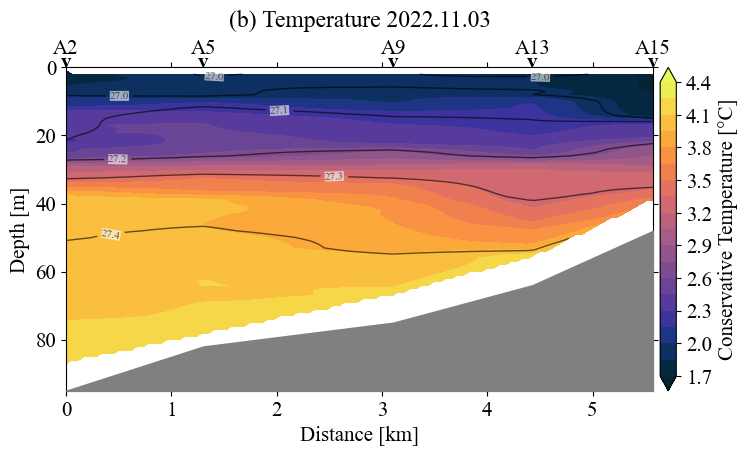

In [64]:
# TEMPERATURE
ax,_,_ = Oc.plot_CTD_single_section(CTD, section, parameter='CT',
                               clabel='Conservative Temperature [\N{DEGREE SIGN}C]',
                              cmap='cmo.thermal', clevels=np.arange(1.7,4.5,0.15)) #, ticks=np.arange(1.7, 4.3, 0.2)) #, contourlevels=np.arange(2,5)) 
ax.set_title('(b) Temperature 2022.11.03', y=1.1, fontsize = 17)
#plt.savefig("C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/ocean_plots/DATETcon_cross_221103.png",bbox_inches = "tight", dpi = 300)
#plt.savefig("C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/ocean_plots/DATETcon_along_221103.png",bbox_inches = "tight", dpi = 300)
#help(Oc.plot_CTD_single_section)

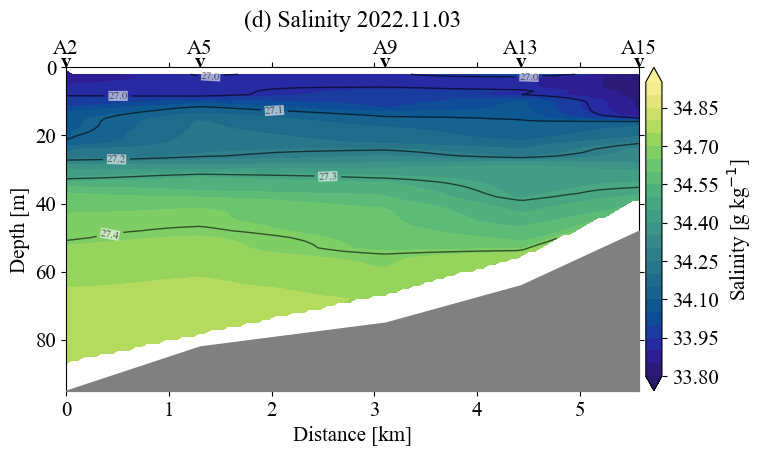

In [65]:
# SALINITY 
ax,_,_ = Oc.plot_CTD_single_section(CTD, section, parameter='SA',
                               clabel='Salinity [g kg$^{-1}$]',
                              cmap='cmo.haline', clevels=np.arange(33.8,34.95,0.05)) 
ax.set_title('(d) Salinity 2022.11.03', y=1.1, fontsize = 17)
#plt.savefig("C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/ocean_plots/DATEScon_cross_221031.png",bbox_inches = "tight", dpi = 300)
plt.savefig("C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/ocean_plots/DATEScon_along_221103.png",bbox_inches = "tight", dpi = 300)


In [ ]:

sal=CTD['322']['SA']
temp=CTD['322']['CT']
depth=CTD['322']['P']

#fig, ax = plt.subplot()
#s=plt.scatter(temp[0:10], sal[0:10], c=depth[0:10])
s=plt.scatter(temp[:], sal[:], c=depth[:])
#fig.colorbar(s)
#Oc.plot_CTD_ts(CTD,section[0:10])
#plt.legend()

In [43]:

Tminvals = []
Tmaxvals = []
for station in section: 
    minval = (min(CTD[station]['CT']))
    maxval = (max(CTD[station]['CT']))
    Tminvals.append(minval)
    Tmaxvals.append(maxval)
print(min(Tminvals))
print(max(Tmaxvals))

step = 0.1

#Tvals = np.arange(min(Tminvals),max(Tmaxvals)+step,step)
Tvals = np.arange(1,5+step,step)
print(Tvals)

Sminvals = []
Smaxvals = []
for station in section: 
    minval = (min(CTD[station]['SA']))
    maxval = (max(CTD[station]['SA']))
    Sminvals.append(minval)
    Smaxvals.append(maxval)
print(min(Sminvals))
print(max(Smaxvals))

#Svals = np.arange(min(Sminvals),max(Smaxvals)+step,step)
Svals = np.arange(30,35+step,step)
#print(max(Smaxvals))


levels = np.arange(26,36,0.25)


2.2269034106460146
4.482798672479131
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]
34.10468172278886
34.82866477186473


['A4', 'A5', 'A6', 'A7*', 'A2', 'A5', 'A9', 'A13', 'A15']


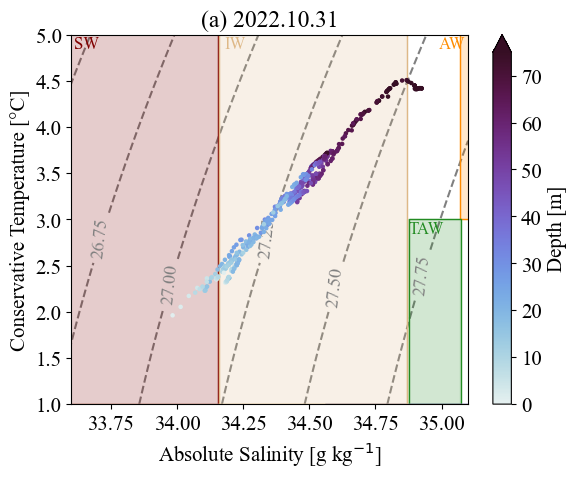

In [69]:
section = adv_UNIS+adv_along
print(section)

alpha = 0.2
ftsz = 12
fig, ax = plt.subplots()
TSdiagram(ax,Svals,Tvals,levels)
for station in section:
    sal =CTD[station]['SA']
    #sal =CTD[station]['S']
    #temp=CTD[station]['T']
    temp=CTD[station]['CT']
    depth=CTD[station]['z']
    S = ax.scatter(sal,temp,s=5, cmap='cmo.dense', #cmap = 'Blues', 
                   c=-depth, vmin = 0,vmax = 75,zorder = 10)
fig.colorbar(S,label='Depth [m]', extend='max')
#cbar.ax.invert_yaxis()
ax.set_xlim([33.6,35.1])
ax.set_ylim([1,5])
ax.add_patch(Rectangle((35.07, 3), 0.5, 3, fc='darkorange', alpha = alpha, edgecolor ='darkorange', linewidth = 1)) # AW
ax.add_patch(Rectangle((35.07, 3),0.5, 3,fc='none', edgecolor ='darkorange',linewidth = 1)) # AW
ax.add_patch(Rectangle((34.46, -10), 34.97-34.46, 10, fc='lightseagreen', alpha = alpha, edgecolor ='lightseagreen',linewidth = 1 )) # ArW
ax.add_patch(Rectangle((34.87, 1),35.07-34.87, 3-1,fc='forestgreen',alpha = alpha, edgecolor ='forestgreen', linewidth = 1 )) # TAW
ax.add_patch(Rectangle((34.875, 1),35.07-34.87, 3-1,fc='none',edgecolor ='forestgreen',linewidth = 1 )) # TAW
ax.add_patch(Rectangle((34.56, -2),1.5, 3,fc='darkblue',alpha = alpha,edgecolor ='darkblue',linewidth = 1 )) #WCW
ax.add_patch(Rectangle((34.56, -2),1.5, 3,fc='none',edgecolor ='darkblue',linewidth = 1 )) #WCW
ax.add_patch(Rectangle((33, 1),1.154, 10,fc='maroon',alpha = alpha,edgecolor ='maroon',linewidth = 1 )) #SW
ax.add_patch(Rectangle((33, 1),1.154, 10,fc='none',edgecolor ='maroon',linewidth = 1 )) #SW
ax.add_patch(Rectangle((32.15, -2), 5, 3,fc='papayawhip',alpha = alpha,edgecolor ='papayawhip',linewidth = 1 )) #LW
ax.add_patch(Rectangle((32.15, -2),5, 3,fc='none',edgecolor ='papayawhip',linewidth = 1 )) #LW
ax.add_patch(Rectangle((34.16, 1),34.87-34.16, 10,fc='burlywood',alpha = alpha,edgecolor ='burlywood',linewidth = 1)) #IW
ax.add_patch(Rectangle((34.16, 1),34.87-34.16, 10,fc='none',edgecolor ='burlywood',linewidth = 1)) #IW

plt.text(34.99,4.85,'AW',color='darkorange',fontsize=ftsz)
#plt.text(34.32,-0.15,'ArW',color='lightseagreen',fontsize=ftsz)
plt.text(34.875,2.85,'TAW',color='forestgreen',fontsize=ftsz)
#plt.text(34.4,0.85,'WCW',color='darkblue',fontsize=ftsz)
plt.text(33.61,4.85,'SW',color='maroon',fontsize=ftsz)
#plt.text(32,0.85,'LW',color='papayawhip',fontsize=ftsz)
plt.text(34.18,4.85,'IW',color='burlywood',fontsize=ftsz)
plt.xlabel('Absolute Salinity [g kg$^{-1}$]')
plt.ylabel('Conservative Temperature [\N{DEGREE SIGN}C]')

#Oc.create_empty_ts(T_extent=[-2., 5.],S_extent=[34.,35.5])


plt.title('(a) 2022.10.31', fontsize = 17)
plt.savefig("C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/ocean_plots/box_TS_221031.png",bbox_inches = "tight", dpi = 300)
#plt.savefig("C:/Users/annak/OneDrive - University of Copenhagen/Desktop/AFG_Cruise/AGF-Adventfjorden/ocean_plots/box_TS_221103.png",bbox_inches = "tight", dpi = 300)
